# contenido  del archivo
El conjunto de datos contiene información detallada sobre productos, ventas, clientes y logística. Incluye variables como categoría, marca, precio, descuentos, inventario, cantidad vendida, tiempos de entrega, satisfacción del cliente y datos de las transacciones

# Objetivo

1. Deserción de Clientes: Identificar qué clientes tienen mayor probabilidad de dejar de comprar `Return_status`


# Librerias

In [1]:
# Limpieza y tratado de datos

import pandas as pd
import re
import sys

# para sistema 

import sys

# para visualizacion 

import matplotlib.pyplot as plt
import seaborn as sns

# para analisis estadistico

from scipy.stats import chi2_contingency

# para preprocesamiento ML

from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

# Funciones

In [ ]:
sys.path.append(r"C:/Users/gabri/Documents/Proyecto_ML_2025/src/utils/")

from Funciones import snake

ModuleNotFoundError: No module named 'sklearn'

# Importacion y Revision de datos

In [ ]:
# Importamos data set y asignamos a variables 

df = pd.read_csv('C:/Users/gabri/Documents/Proyecto_ML_2025/data/raw/super_shop_dataset.csv')

## Estructura del archivo

In [ ]:
# Mostramos parte del df
df.head()

,Product_ID,Category,Sub_Category,Brand,Product_Name,Price,Discount,Final_Price,Stock,Sold_Quantity,...,Customer_Gender,Customer_Type,Payment_Method,Transaction_ID,Order_Status,Delivery_Time,Return_Status,Employee_ID,Shift,Feedback
0,P1000,Toys,Chairs,Nike,Item_D,2684,23,2066.68,192,21,...,Male,Regular,Mobile Payment,T50000,Pending,2,Not Returned,801,Morning,Average
1,P1001,Clothing,Vegetables,Samsung,Item_A,2704,15,2298.40,21,62,...,Female,Regular,Credit Card,T50001,Completed,12,Not Returned,173,Evening,Good
2,P1002,Toys,Vegetables,Apple,Item_C,3173,6,2982.62,66,11,...,Male,New,Credit Card,T50002,Pending,7,Returned,974,Evening,Average
3,P1003,Furniture,Laptop,Sony,Item_D,4320,26,3196.80,180,9,...,Male,VIP,Credit Card,T50003,Cancelled,13,Not Returned,206,Morning,Good
4,P1004,Furniture,Shirt,Samsung,Item_B,2557,34,1687.62,81,73,...,Female,Regular,Mobile Payment,T50004,Pending,11,Returned,994,Evening,Good


In [ ]:
# Chequeamos nobres de columnas

df.columns

Index(['Product_ID', 'Category', 'Sub_Category', 'Brand', 'Product_Name',
       'Price', 'Discount', 'Final_Price', 'Stock', 'Sold_Quantity', 'Rating',
       'Reviews', 'Supplier', 'Purchase_Cost', 'Profit', 'Expiry_Date',
       'Manufacturing_Date', 'Warehouse_Location', 'Shelf_Number',
       'Customer_Age', 'Customer_Gender', 'Customer_Type', 'Payment_Method',
       'Transaction_ID', 'Order_Status', 'Delivery_Time', 'Return_Status',
       'Employee_ID', 'Shift', 'Feedback'],
      dtype='object')

In [ ]:
# estandarizamos los nombres 

df.columns = [snake(col) for col in df.columns]

NameError: name 'snake' is not defined

In [ ]:
# Resumen de dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          5000 non-null   object 
 1   category            5000 non-null   object 
 2   sub_category        5000 non-null   object 
 3   brand               5000 non-null   object 
 4   product_name        5000 non-null   object 
 5   price               5000 non-null   int64  
 6   discount            5000 non-null   int64  
 7   final_price         5000 non-null   float64
 8   stock               5000 non-null   int64  
 9   sold_quantity       5000 non-null   int64  
 10  rating              5000 non-null   float64
 11  reviews             5000 non-null   int64  
 12  supplier            5000 non-null   object 
 13  purchase_cost       5000 non-null   int64  
 14  profit              5000 non-null   float64
 15  expiry_date         5000 non-null   object 
 16  manufa

In [ ]:
# Función para detectar caracteres especiales en todo el DataFrame
def caracteres(df):
    return df.map(lambda x: bool(pd.notna(x) and isinstance(x, str) and bool(pd.Series(x).str.contains(r'[^a-zA-Z0-9]', regex=True).any())))


print(caracteres(df))

      Product_ID  Category  Sub_Category  Brand  Product_Name  Price  \
0          False     False         False  False          True  False   
1          False     False         False  False          True  False   
2          False     False         False  False          True  False   
3          False     False         False  False          True  False   
4          False     False         False  False          True  False   
...          ...       ...           ...    ...           ...    ...   
4995       False     False         False  False          True  False   
4996       False     False         False  False          True  False   
4997       False     False         False  False          True  False   
4998       False     False         False  False          True  False   
4999       False     False         False  False          True  False   

      Discount  Final_Price  Stock  Sold_Quantity  ...  Customer_Gender  \
0        False        False  False          False  ...      

In [ ]:
print(df['Product_Name'].unique())
print(df['Payment_Method'].unique())
print(df['Return_Status'].unique())

NameError: name 'df' is not defined

In [ ]:
# Vemos los unicos 

df.nunique()

product_id            5000
category                 5
sub_category             5
brand                    5
product_name             4
price                 3123
discount                50
final_price           4874
stock                  199
sold_quantity          100
rating                  41
reviews                500
supplier                 3
purchase_cost         2852
profit                4984
expiry_date           5000
manufacturing_date    5000
warehouse_location       3
shelf_number            49
customer_age            52
customer_gender          2
customer_type            3
payment_method           3
transaction_id        5000
order_status             3
delivery_time           14
return_status            2
employee_id            896
shift                    3
feedback                 3
dtype: int64

In [ ]:
# identificamos tipos de datos categoricos por cantidad de unicos y tipo de datos

variables_categoricas = ['category','sub_category','brand',
                         'product_name','customer_gender',
                         'customer_type','payment_method',
                         'supplier','warehouse_location',
                         'order_status','return_status',
                         'shift','feedback']

df[variables_categoricas] = df[variables_categoricas].astype('category')

In [ ]:
# Revisamos dublicados en general 

df.duplicated().sum()

np.int64(0)

# Analisis Exploratorio de los datos

## Descripcion estadistica 

In [ ]:
# Descripcion estadistica 

df.select_dtypes(['number']).describe()

,price,discount,final_price,stock,sold_quantity,rating,reviews,purchase_cost,profit,shelf_number,customer_age,delivery_time,employee_id
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2496.502200,24.189600,1889.533832,100.823400,49.811800,3.009660,246.230800,2009.571600,-120.037768,25.148000,43.019600,7.569000,545.070800
std,1436.775614,14.293373,1155.905452,57.947495,29.067641,1.139949,144.427846,1146.702806,1641.722155,14.128567,15.174507,4.016524,257.155505
min,50.000000,0.000000,30.160000,1.000000,0.000000,1.000000,0.000000,30.000000,-3934.400000,1.000000,18.000000,1.000000,100.000000
25%,1247.750000,12.000000,909.772500,51.000000,25.000000,2.000000,119.750000,1018.750000,-1295.442500,13.000000,29.000000,4.000000,326.000000
50%,2495.000000,24.000000,1838.585000,101.000000,50.000000,3.000000,242.500000,2010.000000,-157.750000,25.000000,43.000000,8.000000,540.000000
75%,3774.000000,36.000000,2729.867500,152.000000,75.000000,4.000000,370.000000,3014.000000,1018.462500,37.000000,56.000000,11.000000,767.000000
max,4999.000000,49.000000,4999.000000,199.000000,99.000000,5.000000,499.000000,3999.000000,4627.800000,49.000000,69.000000,14.000000,998.000000


## Distribucion de datos `numericos`

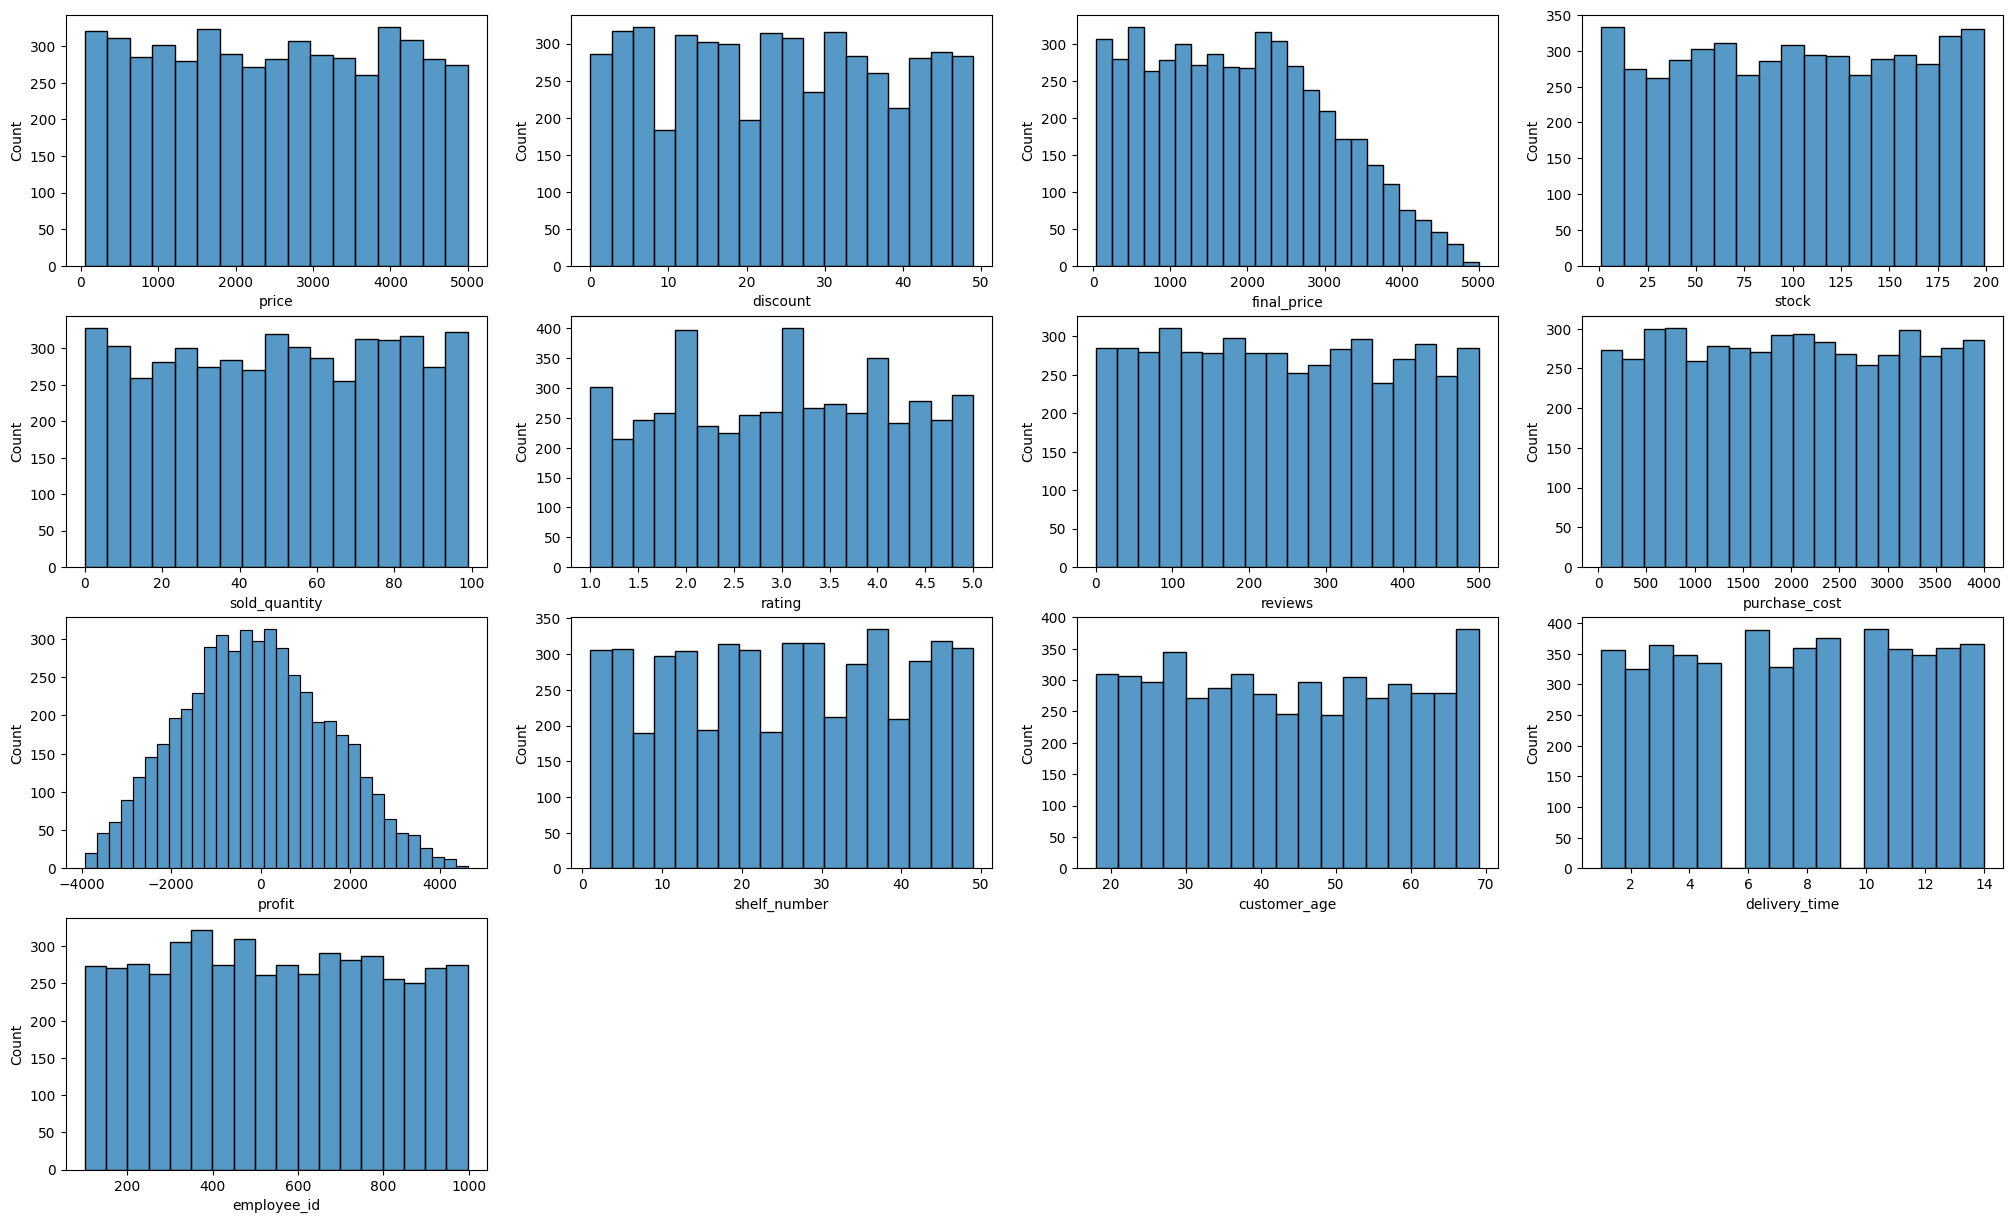

In [ ]:
plt.figure(figsize=(25,15))

for index, col in enumerate(df.select_dtypes(['number']).columns):
    plt.subplot(4,4,index+1)
    sns.histplot(x= col, data=df)

La mayoria de las variables del dataset  presentan una distribucion normal a exepcion de `final_price` que representa un sesgo en cuanto a `profit` vemos una distribucion normal con beneficios y perdidas en algunos productos

## Relacion entre Variables `Numericas`

Haremos un análisis de correlación para identificar qué variables están más relacionadas entre sí y evaluar si podemos  eliminar algunas

<Axes: >

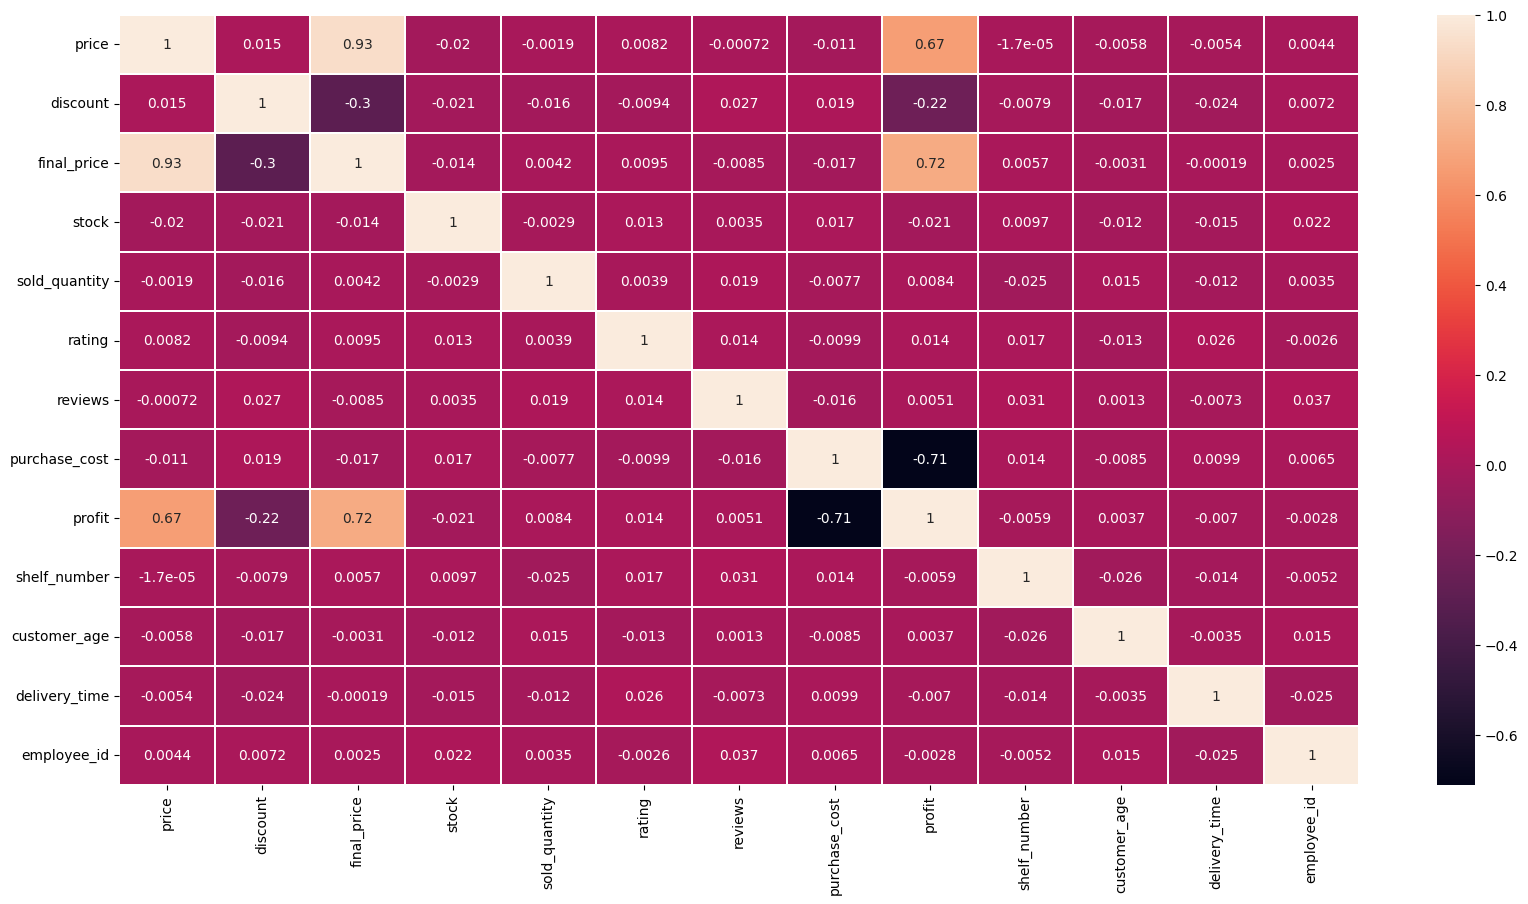

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes('number').corr(),annot=True,linewidths=0.1)

Segun nuestro heat map eliminaremos las siguientes variables:

1. `final_price`  tiene una correlacio de 0.93  con nuestra variable `price` lo que indica que estan muy relacionada 
2. `shelf_number`, `customer_age` no tienen mucha relacion entre variables asi que siento que no  debe aportamucho a nuestra prediccion


## Outliers en variables `Numericas`

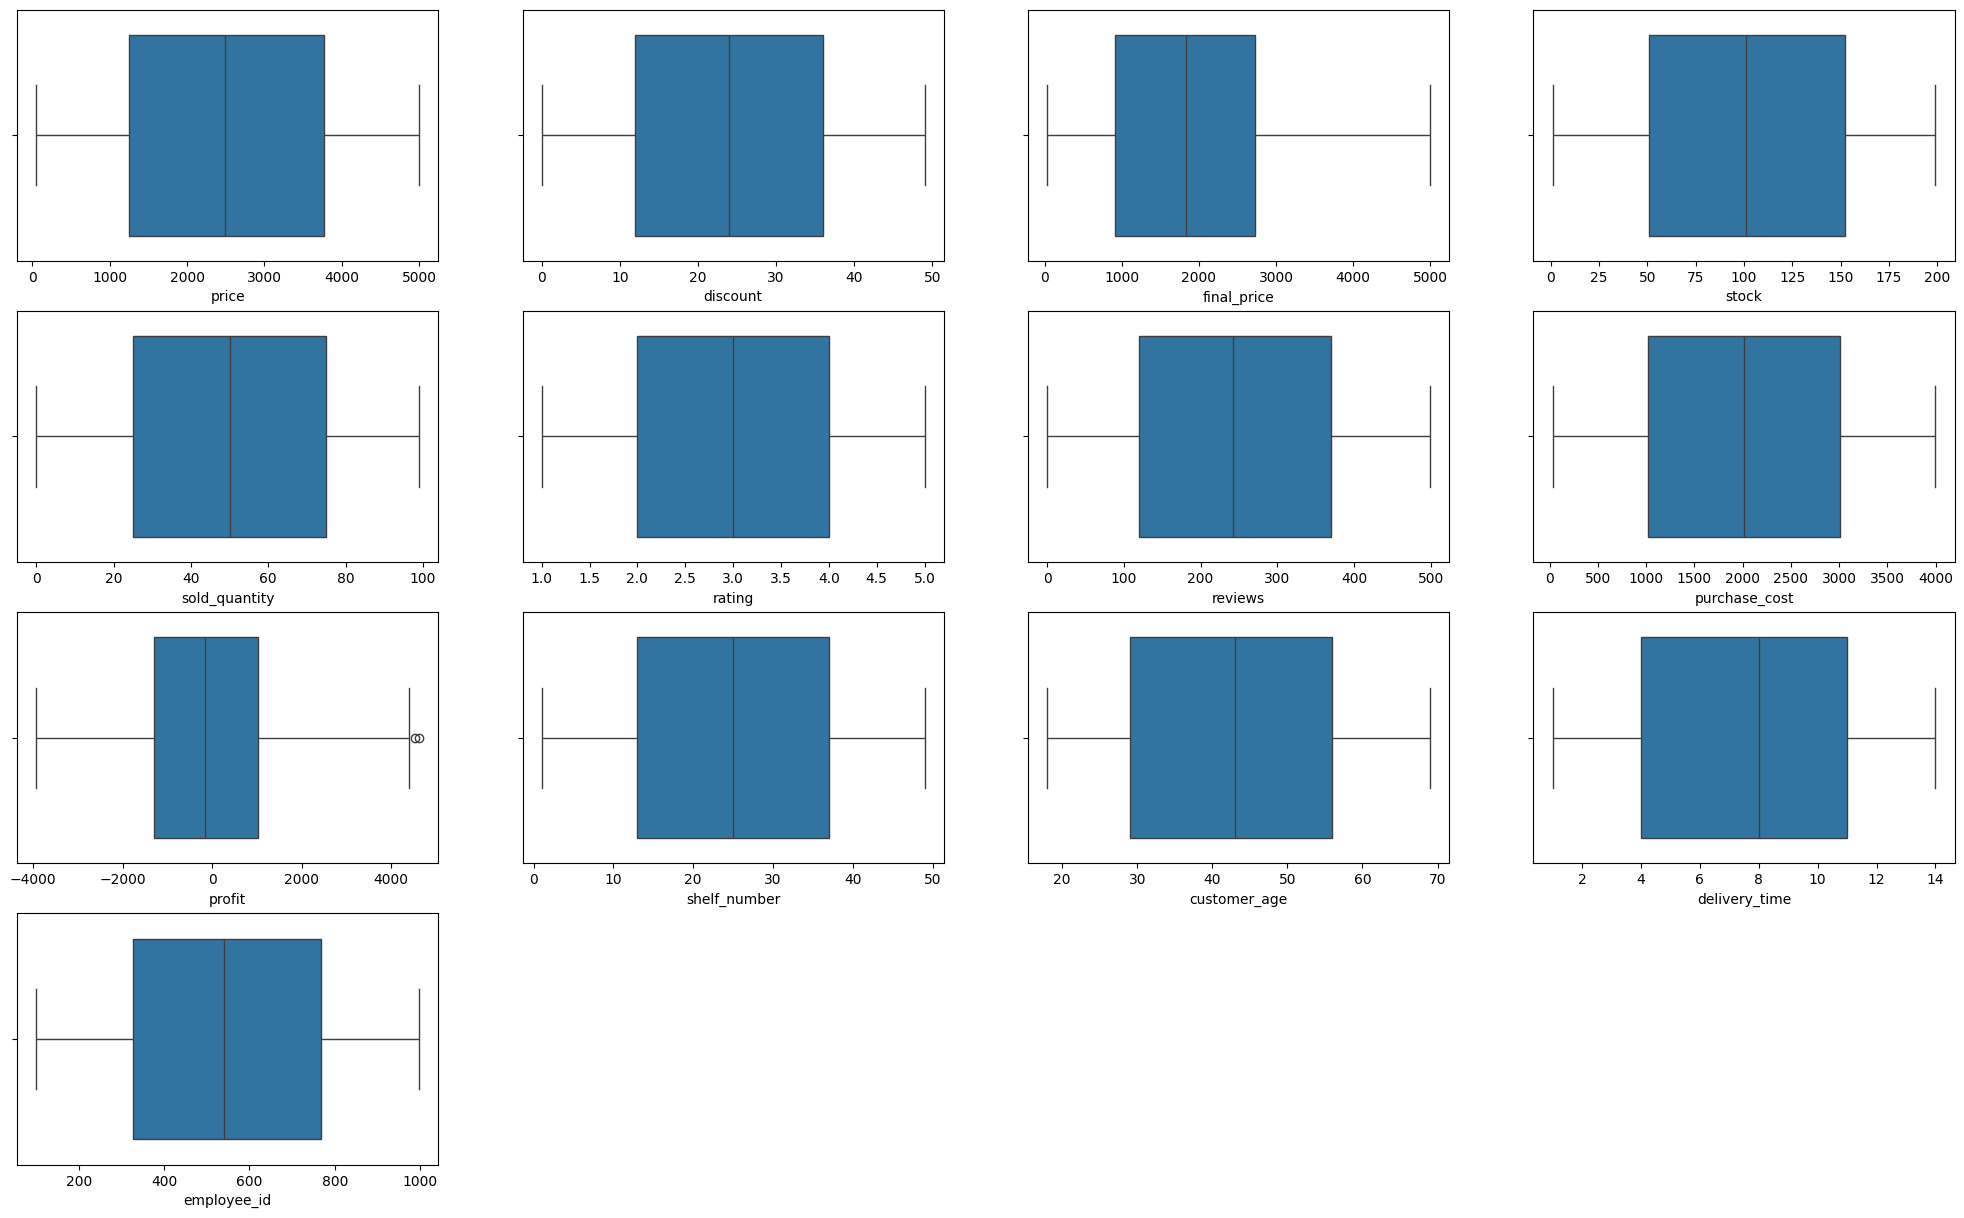

In [ ]:
# Veamos outliers en nuestros valores numericos 

plt.figure(figsize=(25,15))

for index, col in enumerate(df.select_dtypes(['number']).columns):
    plt.subplot(4,4,index+1)
    sns.boxplot(x= col, data=df)

Al analizar nuestras variables numericas con boxplot nos damos cuenta de que la distribucion de los datos estan bien distribuida  sin valores extremadamente raros  a excepsion de `profit` asi que veremos cuanto representan esos valores a mi data set

In [ ]:
# calculamos el peso de los outliers en nuestra data
  
valores_atipicos = df[df['profit'] > df['profit'].quantile(0.75)]

print(f'Representa un :{len(valores_atipicos)/ len(df)*100} %')

Representa un :25.0 %


el peso que representa es bastante conciderable asi que evalueremos las relaciones entre  estas variables `'price', 'discount', 'sold_quantity','purchase_cost'`

<Axes: >

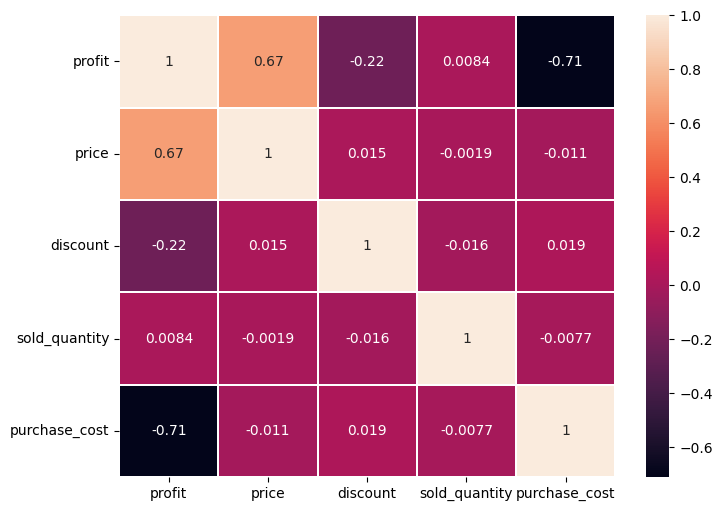

In [ ]:
# Vemos  si profit esta relacionado con alguna de estas variables

corre = df[['profit', 'price', 'discount', 'sold_quantity','purchase_cost']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corre, annot=True, linewidths=0.1)

Vemos una alta relacion entre `profit` y `purchase_cost` asi que podriamos decir que los outliers en profit se deben a que existe un margen de ganancia mas alto 

## Relacion entre Variables `Categoricas`

In [ ]:
categoricas = df.select_dtypes(include=['category']).columns
chi_cuadrado=pd.DataFrame(index=categoricas, columns=categoricas)

In [ ]:
for var1 in categoricas:
    for var2 in categoricas:
        if var1 == var2:
            chi_cuadrado.loc[var1, var2] = 1
        else:
            tabla_contingencia = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            chi_cuadrado.loc[var1, var2] = p

chi_cuadrado = chi_cuadrado.astype(float)

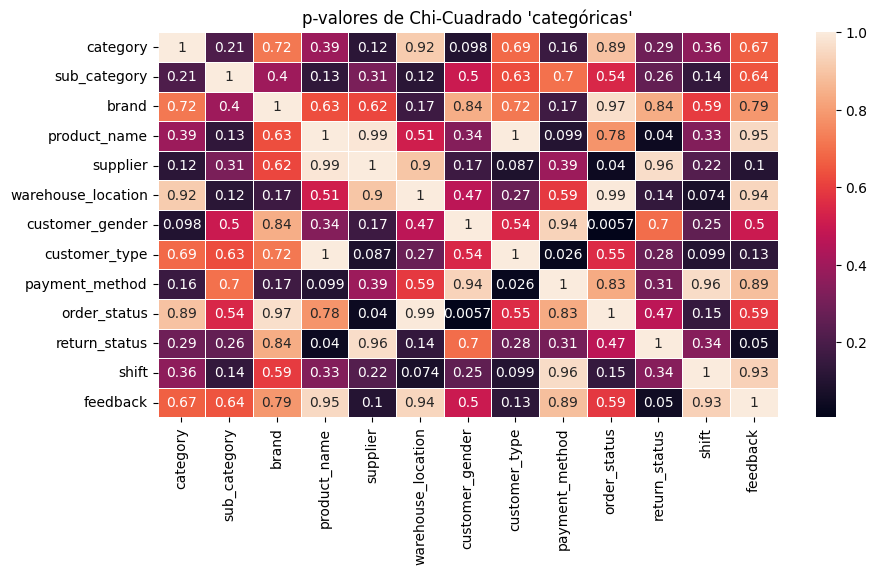

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(chi_cuadrado, annot=True, linewidths=0.5)
plt.title("p-valores de Chi-Cuadrado 'categóricas'")
plt.show()

Aqui mantendremos las columnas que solo tienen mayor relacion estadistica que son la que pueden aportar mas valor a nuestro modelo predictivo

`'product_name','return_status','supplier','order_status','customer_gender','customer_type','payment_method','feedback'`

## Analisis de (Target)

## Distribucion

Como  ya sabemos nuestra target es categorica asi que obtaremos por hacer modelos de clasificacion 

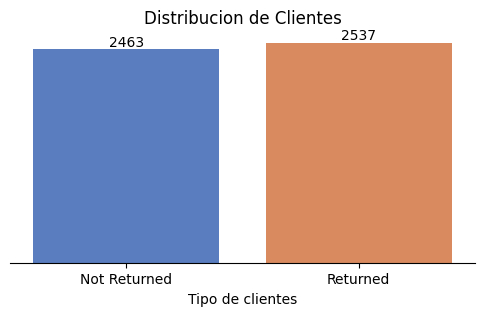

In [ ]:
# Graficamos la frecruencia de nuestra columna objetivo 

plt.figure(figsize=(6,3))

distri_clientes= sns.countplot(x=df['return_status'],
                               hue= df['return_status'],
                               palette='muted')

plt.title('Distribucion de Clientes')
plt.xlabel('Tipo de clientes')
plt.ylabel('Frecuencia')


for i in distri_clientes.containers:
    distri_clientes.bar_label(i,fmt='%d')

distri_clientes.yaxis.set_visible(False)

sns.despine(top=True,left=True)

plt.show()

Aqui podemos apreciar que no existe un desbalanceo en nuestra target por lo que no necesitaremos balanceo de datos

# Guardar como csv

In [ ]:
df.to_csv("super_shop_dataset_limpio.csv",index=False) 